# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Skillfactory---Практический-Machine-Learning" data-toc-modified-id="Skillfactory---Практический-Machine-Learning-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Skillfactory - Практический Machine Learning</a></div><div class="lev2 toc-item"><a href="#19/02/2018---Аномалии,-работа-с-признаками,-пайплайны-(практика)" data-toc-modified-id="19/02/2018---Аномалии,-работа-с-признаками,-пайплайны-(практика)-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>19/02/2018 - Аномалии, работа с признаками, пайплайны (практика)</a></div><div class="lev1 toc-item"><a href="#Создание-пайплайна-и-генерация-признаков" data-toc-modified-id="Создание-пайплайна-и-генерация-признаков-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Создание пайплайна и генерация признаков</a></div><div class="lev2 toc-item"><a href="#Посмотрим-на-данные" data-toc-modified-id="Посмотрим-на-данные-21"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Посмотрим на данные</a></div><div class="lev2 toc-item"><a href="#Генерим-признаки" data-toc-modified-id="Генерим-признаки-22"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Генерим признаки</a></div><div class="lev2 toc-item"><a href="#Подбор-гипер-параметров" data-toc-modified-id="Подбор-гипер-параметров-23"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Подбор гипер-параметров</a></div><div class="lev3 toc-item"><a href="#Pipeline" data-toc-modified-id="Pipeline-231"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>Pipeline</a></div><div class="lev3 toc-item"><a href="#Подбор-гиперпараметров" data-toc-modified-id="Подбор-гиперпараметров-232"><span class="toc-item-num">2.3.2&nbsp;&nbsp;</span>Подбор гиперпараметров</a></div><div class="lev4 toc-item"><a href="#Grid-search" data-toc-modified-id="Grid-search-2321"><span class="toc-item-num">2.3.2.1&nbsp;&nbsp;</span>Grid search</a></div><div class="lev4 toc-item"><a href="#Random-Search" data-toc-modified-id="Random-Search-2322"><span class="toc-item-num">2.3.2.2&nbsp;&nbsp;</span>Random Search</a></div><div class="lev3 toc-item"><a href="#HyperOpt" data-toc-modified-id="HyperOpt-233"><span class="toc-item-num">2.3.3&nbsp;&nbsp;</span>HyperOpt</a></div><div class="lev2 toc-item"><a href="#Ваш-черед" data-toc-modified-id="Ваш-черед-24"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Ваш черед</a></div><div class="lev3 toc-item"><a href="#Новые-признаки" data-toc-modified-id="Новые-признаки-241"><span class="toc-item-num">2.4.1&nbsp;&nbsp;</span>Новые признаки</a></div><div class="lev2 toc-item"><a href="#Поиск-гиперпараметров" data-toc-modified-id="Поиск-гиперпараметров-25"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Поиск гиперпараметров</a></div>

# Skillfactory - Практический Machine Learning
## 19/02/2018 - Аномалии, работа с признаками, пайплайны (практика)

<center> Шестаков Андрей </center>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.base import BaseEstimator, TransformerMixin


import warnings                                  # чтобы никто не мешал бесчинствам с кодом
warnings.filterwarnings('ignore')


%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 8)

# Создание пайплайна и генерация признаков
<center>Шестаков Андрей</center>

В этом задании мы рассмотрим данные с предыдущего Sberbank Data Science Contest. К сожалению найти страницу с конкурсом уже не получается.

Одной из задач была опредление пола владельца карты по его транзакциям на карте. Зачем это нужно - одному сберу известно, но эта задача была хороша тем, что в ней можно нагенерировать много разных признаков

Есть такая [презентация](https://alexanderdyakonov.files.wordpress.com/2016/10/dj2016_sdsj_vis.pdf) с предварительным анализом данных и идеями про признаки

Нам понадобятся файлы `customers_gender_train.csv`, `transactions.tsv.gz`, `mcc_types.tsv` и `trans_types.tsv`.

## Посмотрим на данные

Это метки ответов

In [2]:
df_gender = pd.read_csv('data/customers_gender_train.csv')
df_gender.head()

,customer_id,gender
0,75562265,0
1,10928546,1
2,69348468,1
3,84816985,1
4,61009479,0


Это сами транзакции (отрицательные транзакции - списывание, положительные - зачисление на счет)

In [3]:
df_transactions = pd.read_csv('data/transactions.csv.gz')
df_transactions.head()

,customer_id,tr_datetime,mcc_code,tr_type,amount,term_id
0,39026145,0 10:23:26,4814,1030,-2245.92,NaN
1,39026145,1 10:19:29,6011,7010,56147.89,NaN
2,39026145,1 10:20:56,4829,2330,-56147.89,NaN
3,39026145,1 10:39:54,5499,1010,-1392.47,NaN
4,39026145,2 15:33:42,5499,1010,-920.83,NaN


Далее, расшифровки кодов [mcc](https://ru.wikipedia.org/wiki/Merchant_Category_Code) и транзакций

In [4]:
df_tr = pd.read_csv('data/tr_types.csv', sep=';')
df_tr.head()

,tr_type,tr_description
0,3200,Плата за предоставление услуг посредством моби...
1,3210,Плата за предоставление отчета по счету карты ...
2,3800,Плата за обслуживание банковской карты (за пер...
3,4000,Плата за получение наличных в Сбербанке
4,4001,Плата за получение наличных в Сбербанке (в дру...


In [5]:
df_mcc = pd.read_csv('data/tr_mcc_codes.csv', sep=';')
df_mcc.head()

,mcc_code,mcc_description
0,742,Ветеринарные услуги
1,1711,"Генеральные подрядчики по вентиляции, теплосна..."
2,1731,Подрядчики по электричеству
3,1799,"Подрядчики, специализированная торговля — нигд..."
4,2741,Разнообразные издательства/печатное дело


Первое что мы видем - это странная дата и суммы в транзакциях. 

В принципе, посмотрев на исходное распределение "относительных" дат по какой-нибудь гендерной группы mcc, становится примерно понятно, что за даты закодированы.

Ну а суммы транзакций организаторы просто умножили на $\pi^{\exp}$ =)

Преобразование будет проделано ниже, но при желании, можете сами со всем разобраться.

In [3]:
from pandas import Timestamp, DateOffset

In [7]:
def preproc_transactions(df_transactions):
    sec_per_day = 86400
    sec_per_hour = 3600
    
    start_date = 1420070400 - 154 * sec_per_day - 3 * sec_per_hour
    
    df_transactions.loc[:, 'day'] = df_transactions.tr_datetime\
                                               .str.split(' ')\
                                               .str.get(0)\
                                               .astype(int)
    df_transactions.loc[:, 'time_raw'] = df_transactions.tr_datetime\
                                                    .str.split(' ')\
                                                    .str.get(1)

    # set temp dt
    df_transactions.loc[:, 'dt_temp'] = pd.to_datetime(df_transactions.loc[:, 'time_raw'], 
                                                    format='%H:%M:%S')\
                                        + DateOffset(years=115)
    
    df_transactions = df_transactions.assign(dt = lambda x: x.dt_temp.astype(np.int64) // 10**9
                                             + (x.day - 153) * sec_per_day)\
                                     .assign(weekday = lambda x: ((x.day + 4) % 7 + 1))
        
    df_transactions.loc[:, 'datetime'] = pd.to_datetime(df_transactions.dt, unit='s')
    df_transactions.loc[:, 'date'] = df_transactions.loc[:, 'datetime'].dt.strftime('%Y-%m-%d')
    df_transactions.loc[:, 'hour'] = df_transactions.loc[:, 'datetime'].dt.strftime('%H')
    
    df_transactions = df_transactions.drop(['dt_temp', 'time_raw', 'tr_datetime'], axis=1)
    
    df_transactions.loc[:, 'amount'] = np.round(df_transactions.loc[:, 'amount']/(np.pi**np.exp(1)))
            
    return df_transactions

In [8]:
df_transactions = df_transactions.pipe(preproc_transactions)

In [9]:
df_transactions.head()

,customer_id,mcc_code,tr_type,amount,term_id,day,dt,weekday,datetime,date,hour
0,39026145,4814,1030,-100.0,NaN,0,1406888606,5,2014-08-01 10:23:26,2014-08-01,10
1,39026145,6011,7010,2500.0,NaN,1,1406974769,6,2014-08-02 10:19:29,2014-08-02,10
2,39026145,4829,2330,-2500.0,NaN,1,1406974856,6,2014-08-02 10:20:56,2014-08-02,10
3,39026145,5499,1010,-62.0,NaN,1,1406975994,6,2014-08-02 10:39:54,2014-08-02,10
4,39026145,5499,1010,-41.0,NaN,2,1407080022,7,2014-08-03 15:33:42,2014-08-03,15


## Генерим признаки

В качестве базовых признаков, можно взять, например, 
* количество (доля) транзакций по каждому mcc_code
* количество (доля) транзакций в разные промежутки времени

In [10]:
def gen_features(df_gender, df_transactions):
    
    df_mcc_counts = \
        df_transactions.pivot_table(index=['customer_id'], columns='mcc_code', values='amount', 
                             aggfunc=np.size, fill_value=0)

    df_mcc_counts = df_mcc_counts.rename_axis(lambda x: 'mcc_{}_count'.format(x), axis=1)

    df_hour_rations = \
        df_transactions.pivot_table(index=['customer_id'], columns='hour', values='amount', 
                             aggfunc=np.size, fill_value=0)

    # Сложная и нетривиальная конструкция
    total = df_hour_rations.sum(axis=1)
    df_hour_rations.loc[:, 'morning'] = (df_hour_rations.loc[:, '05':'11'].sum(axis=1).T/total).T
    df_hour_rations.loc[:, 'day'] = (df_hour_rations.loc[:, '12':'17'].sum(axis=1).T/total).T
    df_hour_rations.loc[:, 'evening'] = (df_hour_rations.loc[:, '18':'23'].sum(axis=1).T/total).T
    df_hour_rations.loc[:, 'night'] = (df_hour_rations.loc[:, '00':'04'].sum(axis=1).T/total).T


    # Объединяем:
    df_features = df_gender.join(df_mcc_counts, on='customer_id', how='left')\
                           .join(df_hour_rations.loc[:, ['morning', 'day', 'evening', 'night']], on='customer_id', how='left')
        
    return df_features

# создаем сласс для использования в FeatureUnion
class Gen_features_class(BaseEstimator, TransformerMixin):
    def __init__(self,df_gender):
        self.df_gender=df_gender
    
    
    def fit(self, df_transactions, y=None):
        return self

    def transform(self, X):
        return  self.df_gender.pipe(gen_features, X)

In [11]:
df_features = df_gender.pipe(gen_features, df_transactions)

In [12]:
label = 'gender'
idx_features = df_features.columns != label

In [13]:
X = df_features.loc[:, idx_features].values
y = df_features.loc[:, ~idx_features].values.flatten()

## Подбор гипер-параметров

### Pipeline

Сделаем простой sklearn пайплайн, который делает следующее:
* Нормирует признаки через StandartScaler
* Запускает лог-регрессию

In [4]:
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import OneHotEncoder, StandardScaler

from sklearn.linear_model import LogisticRegression

In [15]:
model = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression())
])

In [16]:
RND_SEED = 123

### Подбор гиперпараметров

До этого мы исключительно смотрели, как влияет на меру качества какой-то один параметр при фиксированных остальных. Пришло время перебирать все что можно!

В базовом варианте, это делается либо через `Grid Search`, либо через `Random Search`. Какие ключевые отличия?
* В `Grid Search` вы в явнов виде задаете возможные значения каждого гипер-параметра, который хотите варьировать. Соответственно, выполняется **полный** перебор всех возможных комбинаций
* В `Random Search` допукается указание распределения параметров, например "равномерно, на интервале от 0 до 100" или "нормальное распределение с таким-то цетром и такой-то дисперсией. Соответственно, так как это случайный перебор, то **вы** просто **задаете** количество случайных комбинаций, которые будут проверяться

Может показаться, что делать случайный перебор опасно - там же все случайно. Но на практике именно он и искользуется в силу двух причин
* Полный перебор большого количества комбинаций очень долгий
* Мы можем просто пропустить значения гиперпараметра, которые сильно влияют на метрику качества (см рисунок снизу)

<img src='img/gridsearch.jpeg'>

Попробуем оба варианта

#### Grid search

In [5]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold


In [18]:
# Задаем значения параметров, которые хотим проверить

# в данном случае "__" разленяет название гиперпараметра от этапа, где этот гиперпараметр используется
# если у нас будет не пайплайн, а просто один классификатор, то разделитель указывать не нужно
param_grid = {
    'scaler__with_mean': [False, True],
    'clf__penalty': ['l1', 'l2'],
    'clf__random_state': [RND_SEED],
    'clf__C': np.logspace(-5, 3, 10)
}

print(param_grid)

# Задаем схему кросс-валидации
cv = StratifiedKFold(n_splits=5, random_state=RND_SEED, shuffle=True)

{'scaler__with_mean': [False, True], 'clf__penalty': ['l1', 'l2'], 'clf__random_state': [123], 'clf__C': array([1.00000000e-05, 7.74263683e-05, 5.99484250e-04, 4.64158883e-03,
       3.59381366e-02, 2.78255940e-01, 2.15443469e+00, 1.66810054e+01,
       1.29154967e+02, 1.00000000e+03])}


In [19]:
grid_searcher = GridSearchCV(model, param_grid, 
                             scoring='roc_auc', 
                             n_jobs=-1, cv=cv, 
                             verbose=2)

grid_searcher.fit(X, y)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV] clf__C=1e-05, clf__penalty=l1, clf__random_state=123, scaler__with_mean=False 
[CV] clf__C=1e-05, clf__penalty=l1, clf__random_state=123, scaler__with_mean=False 
[CV] clf__C=1e-05, clf__penalty=l1, clf__random_state=123, scaler__with_mean=False 
[CV] clf__C=1e-05, clf__penalty=l1, clf__random_state=123, scaler__with_mean=False 
[CV] clf__C=1e-05, clf__penalty=l1, clf__random_state=123, scaler__with_mean=False 
[CV]  clf__C=1e-05, clf__penalty=l1, clf__random_state=123, scaler__with_mean=False, total=   0.1s
[CV] clf__C=1e-05, clf__penalty=l1, clf__random_state=123, scaler__with_mean=True 
[CV]  clf__C=1e-05, clf__penalty=l1, clf__random_state=123, scaler__with_mean=False, total=   0.1s
[CV] clf__C=1e-05, clf__penalty=l1, clf__random_state=123, scaler__with_mean=True 
[CV]  clf__C=1e-05, clf__penalty=l1, clf__random_state=123, scaler__with_mean=False, total=   0.1s
[CV] clf__C=1e-05, clf__penalty=l1, clf__random_state=1

[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.8s


[CV] clf__C=1e-05, clf__penalty=l2, clf__random_state=123, scaler__with_mean=True 
[CV] clf__C=1e-05, clf__penalty=l2, clf__random_state=123, scaler__with_mean=True 
[CV] clf__C=1e-05, clf__penalty=l2, clf__random_state=123, scaler__with_mean=True 
[CV]  clf__C=1e-05, clf__penalty=l2, clf__random_state=123, scaler__with_mean=False, total=   0.4s
[CV] clf__C=7.742636826811278e-05, clf__penalty=l1, clf__random_state=123, scaler__with_mean=False 
[CV]  clf__C=1e-05, clf__penalty=l2, clf__random_state=123, scaler__with_mean=False, total=   0.3s
[CV] clf__C=7.742636826811278e-05, clf__penalty=l1, clf__random_state=123, scaler__with_mean=False 
[CV] clf__C=7.742636826811278e-05, clf__penalty=l1, clf__random_state=123, scaler__with_mean=False 
[CV] clf__C=7.742636826811278e-05, clf__penalty=l1, clf__random_state=123, scaler__with_mean=False 
[CV]  clf__C=7.742636826811278e-05, clf__penalty=l1, clf__random_state=123, scaler__with_mean=False, total=   0.1s
[CV]  clf__C=1e-05, clf__penalty=l2, c

[CV] clf__C=0.004641588833612777, clf__penalty=l1, clf__random_state=123, scaler__with_mean=False 
[CV] clf__C=0.004641588833612777, clf__penalty=l1, clf__random_state=123, scaler__with_mean=True 
[CV]  clf__C=0.004641588833612777, clf__penalty=l1, clf__random_state=123, scaler__with_mean=False, total=   0.2s
[CV]  clf__C=0.0005994842503189409, clf__penalty=l1, clf__random_state=123, scaler__with_mean=True, total=   0.4s
[CV]  clf__C=0.004641588833612777, clf__penalty=l1, clf__random_state=123, scaler__with_mean=False, total=   0.2s
[CV] clf__C=0.004641588833612777, clf__penalty=l1, clf__random_state=123, scaler__with_mean=True 
[CV] clf__C=0.004641588833612777, clf__penalty=l1, clf__random_state=123, scaler__with_mean=False 
[CV] clf__C=0.004641588833612777, clf__penalty=l1, clf__random_state=123, scaler__with_mean=True 
[CV]  clf__C=0.004641588833612777, clf__penalty=l1, clf__random_state=123, scaler__with_mean=False, total=   0.5s
[CV]  clf__C=0.0005994842503189409, clf__penalty=l2,

[CV] clf__C=0.2782559402207126, clf__penalty=l1, clf__random_state=123, scaler__with_mean=False 
[CV]  clf__C=0.03593813663804626, clf__penalty=l2, clf__random_state=123, scaler__with_mean=False, total=   0.5s
[CV]  clf__C=0.004641588833612777, clf__penalty=l2, clf__random_state=123, scaler__with_mean=True, total=   1.7s
[CV] clf__C=0.004641588833612777, clf__penalty=l2, clf__random_state=123, scaler__with_mean=True 
[CV] clf__C=0.2782559402207126, clf__penalty=l1, clf__random_state=123, scaler__with_mean=True 
[CV]  clf__C=0.2782559402207126, clf__penalty=l1, clf__random_state=123, scaler__with_mean=False, total=   0.6s
[CV] clf__C=0.2782559402207126, clf__penalty=l1, clf__random_state=123, scaler__with_mean=True 
[CV]  clf__C=0.2782559402207126, clf__penalty=l1, clf__random_state=123, scaler__with_mean=False, total=   0.6s
[CV]  clf__C=0.2782559402207126, clf__penalty=l1, clf__random_state=123, scaler__with_mean=False, total=   0.5s
[CV] clf__C=0.2782559402207126, clf__penalty=l1, cl

[CV]  clf__C=2.154434690031882, clf__penalty=l2, clf__random_state=123, scaler__with_mean=False, total=   0.6s
[CV] clf__C=16.681005372000556, clf__penalty=l1, clf__random_state=123, scaler__with_mean=False 
[CV]  clf__C=2.154434690031882, clf__penalty=l2, clf__random_state=123, scaler__with_mean=False, total=   0.8s
[CV]  clf__C=0.2782559402207126, clf__penalty=l2, clf__random_state=123, scaler__with_mean=True, total=   2.3s
[CV]  clf__C=2.154434690031882, clf__penalty=l2, clf__random_state=123, scaler__with_mean=False, total=   0.8s
[CV]  clf__C=0.2782559402207126, clf__penalty=l2, clf__random_state=123, scaler__with_mean=True, total=   2.5s
[CV] clf__C=16.681005372000556, clf__penalty=l1, clf__random_state=123, scaler__with_mean=False 
[CV] clf__C=16.681005372000556, clf__penalty=l1, clf__random_state=123, scaler__with_mean=False 
[CV] clf__C=16.681005372000556, clf__penalty=l1, clf__random_state=123, scaler__with_mean=False 
[CV] clf__C=16.681005372000556, clf__penalty=l1, clf__ran

[Parallel(n_jobs=-1)]: Done 162 tasks      | elapsed:   12.4s


[CV]  clf__C=129.15496650148827, clf__penalty=l2, clf__random_state=123, scaler__with_mean=False, total=   0.7s
[CV]  clf__C=129.15496650148827, clf__penalty=l1, clf__random_state=123, scaler__with_mean=True, total=   1.0s
[CV] clf__C=129.15496650148827, clf__penalty=l2, clf__random_state=123, scaler__with_mean=True 
[CV] clf__C=1000.0, clf__penalty=l1, clf__random_state=123, scaler__with_mean=False 
[CV]  clf__C=129.15496650148827, clf__penalty=l2, clf__random_state=123, scaler__with_mean=False, total=   0.7s
[CV] clf__C=1000.0, clf__penalty=l1, clf__random_state=123, scaler__with_mean=False 
[CV]  clf__C=129.15496650148827, clf__penalty=l2, clf__random_state=123, scaler__with_mean=False, total=   0.6s
[CV] clf__C=1000.0, clf__penalty=l1, clf__random_state=123, scaler__with_mean=False 
[CV]  clf__C=16.681005372000556, clf__penalty=l2, clf__random_state=123, scaler__with_mean=True, total=   2.0s
[CV] clf__C=1000.0, clf__penalty=l1, clf__random_state=123, scaler__with_mean=False 
[CV]  

[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   16.9s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=123, shuffle=True),
       error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('clf', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'scaler__with_mean': [False, True], 'clf__penalty': ['l1', 'l2'], 'clf__random_state': [123], 'clf__C': array([1.00000e-05, 7.74264e-05, 5.99484e-04, 4.64159e-03, 3.59381e-02,
       2.78256e-01, 2.15443e+00, 1.66810e+01, 1.29155e+02, 1.00000e+03])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=2)

На выходе в grid_searcher можно посмотреть, какая комбинация оказалась наилучшей, сколько занял рачет и напрямую достать лучшую модель.

In [20]:
grid_searcher.best_params_

{'clf__C': 0.03593813663804626,
 'clf__penalty': 'l1',
 'clf__random_state': 123,
 'scaler__with_mean': True}

In [21]:
grid_searcher.best_score_

0.8333700479549012

In [22]:
results = pd.DataFrame(grid_searcher.cv_results_)

In [23]:
results.head()

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_clf__C,param_clf__penalty,param_clf__random_state,param_scaler__with_mean,params,rank_test_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.150689,0.033193,0.500000,0.500000,1e-05,l1,123,False,"{'clf__C': 1e-05, 'clf__penalty': 'l1', 'clf__...",36,...,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.060887,0.003972,0.000000,0.000000
1,0.298625,0.034829,0.500000,0.500000,1e-05,l1,123,True,"{'clf__C': 1e-05, 'clf__penalty': 'l1', 'clf__...",36,...,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.042744,0.006926,0.000000,0.000000
2,0.292990,0.040477,0.793321,0.799113,1e-05,l2,123,False,"{'clf__C': 1e-05, 'clf__penalty': 'l2', 'clf__...",34,...,0.790877,0.800359,0.790852,0.796988,0.796070,0.800062,0.047545,0.006795,0.006108,0.001423
3,0.352022,0.068793,0.797828,0.804185,1e-05,l2,123,True,"{'clf__C': 1e-05, 'clf__penalty': 'l2', 'clf__...",33,...,0.805513,0.808778,0.784124,0.799038,0.805717,0.803717,0.030536,0.034853,0.010103,0.004604
4,0.177531,0.032504,0.500000,0.500000,7.74264e-05,l1,123,False,"{'clf__C': 7.742636826811278e-05, 'clf__penalt...",36,...,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.055619,0.030233,0.000000,0.000000


In [24]:
best_model = grid_searcher.best_estimator_

#### Random Search

In [6]:
from scipy.stats import randint as sp_randint
from scipy.stats import lognorm as sp_lognorm

In [26]:
sp_lognorm(4).rvs()

3.1506989532696728

In [27]:
# Задаем значения параметров, которые хотим проверить
# Теперь с распределениями
param_grid = {
    'scaler__with_mean': [False, True],
    'clf__penalty': ['l1', 'l2'],
    'clf__random_state': [RND_SEED],
    'clf__C': sp_lognorm(4)
}

print(param_grid)

{'scaler__with_mean': [False, True], 'clf__penalty': ['l1', 'l2'], 'clf__random_state': [123], 'clf__C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fef9bcc1cf8>}


In [28]:
# Рассмотрим 20 случайных комбинаций
random_searcher = RandomizedSearchCV(model, param_grid, n_iter=20, 
                                     random_state=RND_SEED,
                                     scoring='roc_auc', 
                                     n_jobs=-1, cv=cv, 
                                     verbose=2)

random_searcher.fit(X, y)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] clf__C=0.013003686130638284, clf__penalty=l1, clf__random_state=123, scaler__with_mean=False 
[CV] clf__C=0.013003686130638284, clf__penalty=l1, clf__random_state=123, scaler__with_mean=False 
[CV] clf__C=0.013003686130638284, clf__penalty=l1, clf__random_state=123, scaler__with_mean=False 
[CV] clf__C=0.013003686130638284, clf__penalty=l1, clf__random_state=123, scaler__with_mean=False 
[CV] clf__C=0.013003686130638284, clf__penalty=l1, clf__random_state=123, scaler__with_mean=False 
[CV] clf__C=54.02148221946703, clf__penalty=l1, clf__random_state=123, scaler__with_mean=True 
[CV]  clf__C=0.013003686130638284, clf__penalty=l1, clf__random_state=123, scaler__with_mean=False, total=   0.1s
[CV]  clf__C=0.013003686130638284, clf__penalty=l1, clf__random_state=123, scaler__with_mean=False, total=   0.1s
[CV] clf__C=54.02148221946703, clf__penalty=l1, clf__random_state=123, scaler__with_mean=True 
[CV] clf__C=54.0214822194

[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    1.1s


[CV] clf__C=0.17984668960629735, clf__penalty=l2, clf__random_state=123, scaler__with_mean=True 
[CV]  clf__C=6.0873234832561394e-05, clf__penalty=l1, clf__random_state=123, scaler__with_mean=False, total=   0.2s
[CV]  clf__C=6.0873234832561394e-05, clf__penalty=l1, clf__random_state=123, scaler__with_mean=False, total=   0.3s
[CV]  clf__C=6.0873234832561394e-05, clf__penalty=l1, clf__random_state=123, scaler__with_mean=False, total=   0.3s
[CV] clf__C=0.17984668960629735, clf__penalty=l2, clf__random_state=123, scaler__with_mean=True 
[CV] clf__C=0.17984668960629735, clf__penalty=l2, clf__random_state=123, scaler__with_mean=True 
[CV]  clf__C=6.0873234832561394e-05, clf__penalty=l1, clf__random_state=123, scaler__with_mean=False, total=   0.3s
[CV] clf__C=0.17984668960629735, clf__penalty=l2, clf__random_state=123, scaler__with_mean=True 
[CV]  clf__C=739.3313143249965, clf__penalty=l1, clf__random_state=123, scaler__with_mean=True, total=   0.9s
[CV] clf__C=0.066168907176401, clf__pe

[CV]  clf__C=0.023675003937163, clf__penalty=l1, clf__random_state=123, scaler__with_mean=False, total=   0.3s
[CV] clf__C=110.3123821864009, clf__penalty=l2, clf__random_state=123, scaler__with_mean=False 
[CV]  clf__C=0.023675003937163, clf__penalty=l1, clf__random_state=123, scaler__with_mean=False, total=   0.3s
[CV] clf__C=110.3123821864009, clf__penalty=l2, clf__random_state=123, scaler__with_mean=False 
[CV]  clf__C=0.023675003937163, clf__penalty=l1, clf__random_state=123, scaler__with_mean=False, total=   0.3s
[CV] clf__C=110.3123821864009, clf__penalty=l2, clf__random_state=123, scaler__with_mean=False 
[CV]  clf__C=4.686779143259426, clf__penalty=l1, clf__random_state=123, scaler__with_mean=False, total=   1.2s
[CV] clf__C=110.3123821864009, clf__penalty=l2, clf__random_state=123, scaler__with_mean=False 
[CV]  clf__C=110.3123821864009, clf__penalty=l2, clf__random_state=123, scaler__with_mean=False, total=   0.5s
[CV]  clf__C=110.3123821864009, clf__penalty=l2, clf__random_

[CV]  clf__C=0.49930271136349663, clf__penalty=l1, clf__random_state=123, scaler__with_mean=True, total=   0.7s
[CV]  clf__C=0.17597644951448602, clf__penalty=l1, clf__random_state=123, scaler__with_mean=True, total=   5.9s
[CV]  clf__C=0.17597644951448602, clf__penalty=l1, clf__random_state=123, scaler__with_mean=True, total=   6.3s
[CV]  clf__C=0.17597644951448602, clf__penalty=l1, clf__random_state=123, scaler__with_mean=True, total=   6.0s
[CV]  clf__C=0.17597644951448602, clf__penalty=l1, clf__random_state=123, scaler__with_mean=True, total=   6.6s
[CV]  clf__C=0.6846579724234434, clf__penalty=l1, clf__random_state=123, scaler__with_mean=True, total=   9.8s


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   12.1s finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=123, shuffle=True),
          error_score='raise',
          estimator=Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('clf', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))]),
          fit_params=None, iid=True, n_iter=20, n_jobs=-1,
          param_distributions={'scaler__with_mean': [False, True], 'clf__penalty': ['l1', 'l2'], 'clf__random_state': [123], 'clf__C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fef9bcc1cf8>},
          pre_dispatch='2*n_jobs', random_state=123, refit=True,
          return_train_score=True, scoring='roc_auc', verbose=2)

Аналогичный выхлоп

In [29]:
random_searcher.best_params_

{'clf__C': 0.066168907176401,
 'clf__penalty': 'l1',
 'clf__random_state': 123,
 'scaler__with_mean': False}

In [30]:
random_searcher.best_score_

0.8331573859251894

In [31]:
results = pd.DataFrame(random_searcher.cv_results_)

In [32]:
results.head()

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_clf__C,param_clf__penalty,param_clf__random_state,param_scaler__with_mean,params,rank_test_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.165003,0.021792,0.829825,0.834829,0.0130037,l1,123,False,"{'clf__C': 0.013003686130638284, 'clf__penalty...",10,...,0.828339,0.835108,0.826309,0.835922,0.838233,0.833295,0.048188,0.005738,0.004286,0.000864
1,0.510770,0.033953,0.829800,0.849569,54.0215,l1,123,True,"{'clf__C': 54.02148221946703, 'clf__penalty': ...",14,...,0.828253,0.849283,0.826534,0.850176,0.836140,0.848428,0.065872,0.016463,0.003311,0.000720
2,3.758825,0.040259,0.832553,0.848429,0.0988254,l1,123,True,"{'clf__C': 0.09882536189042468, 'clf__penalty'...",3,...,0.830869,0.847940,0.829224,0.849445,0.838956,0.847167,0.164766,0.016707,0.003361,0.000820
3,0.933590,0.024256,0.829790,0.849568,739.331,l1,123,True,"{'clf__C': 739.3313143249965, 'clf__penalty': ...",15,...,0.828243,0.849282,0.826525,0.850174,0.836133,0.848427,0.050162,0.014673,0.003312,0.000720
4,0.230337,0.036903,0.500000,0.500000,6.08732e-05,l1,123,False,"{'clf__C': 6.0873234832561394e-05, 'clf__penal...",19,...,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.068162,0.012040,0.000000,0.000000


In [33]:
best_model = random_searcher.best_estimator_

### HyperOpt

Есть еще другой вариант - "умный" перебор параметров. И вот тут нам помогает библиотека `hyperopt`.

Если невдаваться в детали, то `hyperopt` определяет следующего набора-кандидата с помощью некоторого алгоритма, который балансирует исследование еще не изведанных областей значений гиперпараметров и направления, вдоль которых наблюдались улучшения целеой метрики.

То есть мы задаем некоторую функцию, и ставим себе цель **минимизировать** (такова договоренность в `hyperopt`) ее значение исходя из параметров, которые она принимает.

Например, возьмем функцию $f(x) = \sin(x)/x$ и будем искать ее минимум при условии, что $x$ будет равномерно распределен на интервале $[-7.5, 7.5]$

In [ ]:
# sudo pip install networkx==1.11

In [7]:
from hyperopt import fmin, tpe, hp, Trials, STATUS_OK, rand

In [ ]:
trials = Trials()
best = fmin(
    fn=lambda x: -np.sin(x)/x,
    space=hp.uniform('x', -7.5, 7.5),
    algo=tpe.suggest,
    max_evals=100,
    trials=trials)

print(best)


In [ ]:
x = np.linspace(-10,10,50)
func = lambda x: -np.sin(x)/x
y = func(x)
plt.plot(x,y)

y_best = func(best['x'])
plt.plot(best['x'], y_best, marker='s')

Нашли)

Возвращаясь к нашим баранам, функция вданном случае будет возвращать метрику качества модели (пайплайна) на кроссвалидации. С помощью `hyperopt` мы будем искать минимум этой функции при заданных диаполознах значений гипер параметров.

Но самым важным плюсом, как по мне, является гибкость - в функцию, которую мы хотим минимизировать можно написать все что угодно. Например, сейчас я добавлю вариативность в пайплайне по типу шкалирования между - StandartScaler или RobustScaler.

In [ ]:
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import cross_val_score

In [ ]:
X = df_features.loc[:, idx_features].values
y = df_features.loc[:, ~idx_features].values.flatten()

In [ ]:
def run_trials_template(X, y, params, evals=100):

    def hyperopt_cv(X, y, params):
        
        X_ = X.copy()
        
        # Отделяем параметры лог регрессии в отдельный словарь
        lm_params = {}
        for k, v in params.items():
            if k.startswith('glob'):
                continue                
            elif k.startswith('lm'):
                lm_params[k.split('_', 1)[1]] = v
        
        # Задаем шкалирование
        if params['scaler_type'] == 'standart':
            scaler = StandardScaler(with_mean=params['scaler_centering'])
        else:
            assert params['scaler_type'] == 'robust'
            scaler = RobustScaler(with_centering=params['scaler_centering'])
        
        # Создаем лог рег с нужными параметрами
        clf = LogisticRegression(**lm_params)
        
        # Итоговый пайплайн
        model = Pipeline([
            ('scaler', scaler),
            ('clf', clf)
        ])

        # Схема кросс-валидации
        n_splits = 5
        cv = StratifiedKFold(n_splits=n_splits, shuffle=True, 
                             random_state=RND_SEED)
        scores = cross_val_score(model, X_, y,
                                 scoring='roc_auc', 
                                 cv=cv, 
                                 n_jobs=-1)

        # Возвращаем среднее значение метрики и отклонение (на всякий случай)
        return scores.mean(), scores.std()

    def f(params):
        acc, std = hyperopt_cv(X, y, params)
        return {'loss': -acc, 'qscore': -acc, 'qscore_std': std, 'status': STATUS_OK}

    trials = Trials()
    best = fmin(f, 
                params, 
                algo=tpe.suggest, 
                max_evals=evals, 
                trials=trials, 
                verbose=1)
    
    return trials

In [ ]:
# Задаем пространство поиска
space4_lm = {
    'lm_penalty': hp.choice('penalty', ['l1', 'l2']),
    'lm_C': hp.loguniform('C', -5, 3),
    'lm_class_weight': hp.choice('class_weight', [None, 'balanced']),
    'lm_random_state': RND_SEED,
    'scaler_type': hp.choice('scaler_type', ['standart', 'robust']),
    'scaler_centering': hp.choice('scaler_centering', [False, True])
}

In [ ]:
# Запускаем поиск
trials = run_trials_template(X, y, space4_lm, evals=40)

In [37]:
def trials_df(trials):
    '''
    Функция форматирует результаты hyperopt в dataframe
    '''
    tr_dict = []
    for t in trials:
        trial = dict()
        for k, v in t['misc']['vals'].items():
            trial[k] = v[0]

        trial['qscore'] = -t['result']['qscore']
        trial['qscore_std'] = -t['result']['qscore_std']
        tr_dict.append(trial)

    df_res = pd.DataFrame.from_dict(tr_dict)
    df_res = df_res.sort_values('qscore', ascending=False)
    
    return df_res

Достаем результаты.

Стоит оговорится, что в некоторых столбцах указаны не фактические значение гиперпараметров, а их позиция в соответствуюем поле в `space4_lm`

In [ ]:
df_trials = trials_df(trials)

Здесь `qscore` - метрика качесва, а `scaler_type = 1` означает, что был выбран `scaler_type = robust`

In [ ]:
df_trials.head()

## Ваш черед

### Новые признаки

Задание творческое - придумайте по новому признаку (группе признаков)
* На основе mcc (tr_type)
* На основе временного фактора
* На основе текстов из описания mcc

Реалиуйте их в функции, аналогичной `gen_features`.

In [8]:
import time as tt
import datetime as dt
from tqdm import tqdm

In [9]:
#  преобразование справочника mcc_code в набор числовых векторов df_mcc_
# в качестве словарного пространства взят мешок слов из самого справочника 
import pymorphy2 # Морфологический анализатор.
from collections import Counter # Не считать же частоты самим.
from multiprocessing import Pool


morph=pymorphy2.MorphAnalyzer()
index2word_set = []
for v in df_mcc['mcc_description']:
    for w in v.lower().split(' '):
        wordform=morph.parse(w)[0]
        try:
            if wordform.tag.POS in ['ADJF', 'NOUN', 'VERB']:  
                if wordform.normal_form not in index2word_set:
                    index2word_set.append(wordform.normal_form)
                
        except:
            pass  

size=len(index2word_set)        
        
col_=['mcc_code']
for i_ in range(size):
    col_.append('_'+str(i_))

df_mcc_=pd.DataFrame(data=[], columns=list(col_))

for j_ in tqdm(df_mcc.index):
    v=df_mcc.loc[j_,'mcc_description']
    text_vec = np.zeros((size,), dtype="float32")
    
    reswords=[]
    for w in v.lower().split(' '):
        wordform=morph.parse(w)[0]
        try:
            if wordform.tag.POS in ['ADJF', 'NOUN', 'VERB']:
                reswords.append(wordform.normal_form)
        except:
            pass            
    stat=Counter(reswords)

    for word in stat.keys():
        if word in index2word_set:
            text_vec[index2word_set.index(word)] += 1
    for i_ in range(size):
        df_mcc_.loc[j_,'_'+str(i_) ]=text_vec[i_]
    df_mcc_.loc[j_,'mcc_code']=df_mcc.loc[j_,'mcc_code']

df_mcc_=df_mcc_.set_index('mcc_code')


NameError: name 'df_mcc' is not defined

In [15]:
# добавляем новые параметры в исходный набор (вдобавок к процедуре preproc_transactions)
def new_preproc_transactions(df_transactions):
    
    df_transactions.loc[:, 'vac_date'] = df_transactions.loc[:, 'datetime'].dt.strftime('%m-%d')
    
# Добавляем новый параметр по времени (нерабочее время)
# признак рабочего/нерабочего времени (с учетом выходных и очевидных праздников)
    df_transactions.loc[:,'vacation']=0
    df_transactions.loc[df_transactions['weekday']>=6,'vacation']=1
    df_transactions.loc[df_transactions['hour']<='09','vacation']=1
    df_transactions.loc[df_transactions['hour']>='18','vacation']=1

    vacations=[]
    for i_ in range(1,13):
        vacations.append(dt.datetime(2001,1,i_).strftime('%m-%d'))
    vacations.append(dt.datetime(2001,2,23).strftime('%m-%d'))
    vacations.append(dt.datetime(2001,3,8).strftime('%m-%d'))
    for i_ in range(1,3):
        vacations.append(dt.datetime(2001,5,i_).strftime('%m-%d'))
    for i_ in range(8,9):
        vacations.append(dt.datetime(2001,5,i_).strftime('%m-%d'))

    df_transactions.loc[df_transactions['vac_date'].isin(vacations),'vacation']=1
    df_transactions = df_transactions.drop(['vac_date'], axis=1)

    return df_transactions

def dot_p(i_f):
    global df_mcc_counts
#     i_ = df_mcc_.columns[i_f]
#     df_mcc_counts_.loc[:, i_] = np.dot(df_mcc_counts,df_mcc_.loc[:,i_]) 
    return  np.dot(df_mcc_counts,df_mcc_.loc[:,i_f]) 


def dot_parallel(n_p=1):
# процедура распараллеливания перемножения матриц.
    global df_mcc_counts, df_mcc_counts_
    n_iter=int((len(df_mcc_.columns))/n_p)
    if n_p==1:
        for i_ in tqdm(range(n_iter)):
            dot_p(df_mcc_.columns[i_])
    else:
        print(n_iter)
 
        for k_ in  tqdm(range(n_iter)):
            i_f=k_*n_p
            
            n_p_=n_p
            if i_f+n_p>len(df_mcc_.columns): n_p_=len(df_mcc_.columns)-i_f
            
            list_=[]
            for i_ in range(n_p_): list_.append(df_mcc_.columns[i_f+i_])
            
            p = Pool(n_p_)
            result =p.map(dot_p, list_)
            
            for i_ in range(len(list_)):
                df_mcc_counts_.loc[:, list_[i_]]=result[i_]
        
            p.close()
            p.join()
            
# процедура построения новых параметров             
def new_features(df_gender, df_transactions):
    global df_mcc_counts, df_mcc_counts_
    
    df_mcc_counts = \
        df_transactions.pivot_table(index=['customer_id'], columns='mcc_code', values='amount', 
                             aggfunc=np.size, fill_value=0)


#  Преобразуем матрицу df_mcc_counts с учетом векторов df_mcc_
#  для этого перемножим эти матрицы 
#  матрицы большие, так что можно распараллелить....
    df_mcc_counts_=pd.DataFrame(data=df_mcc_counts.index , columns=['customer_id'])
    df_mcc_counts_ =df_mcc_counts_.set_index('customer_id') 
    
    dot_parallel(20) # считал на AWS заняло 5 минут
        
#  dot_parallel заменяет процедуру ниже. У меня на процессоре ноута она выполняется около 40 мин.
#     for i_ in tqdm(df_mcc_.columns[1:]):
#         df_mcc_counts_.loc[:, i_] = np.dot(df_mcc_counts,df_mcc_.loc[:,i_])        
        

# Добавляем новые параметры по типу времени транзакции (vacation)
    
    df_vacation = \
        df_transactions.pivot_table(index=['customer_id'], columns='vacation', values='amount', 
                             aggfunc=np.size, fill_value=0)
    df_vacation.loc[:, 'vacation'] = df_vacation.loc[:, 1]/df_vacation.loc[:, 0:1].sum(axis=1)


 # Добавляем новые параметры по tr_type 

    df_tr_type_counts = \
        df_transactions.pivot_table(index=['customer_id'], columns='tr_type', values='amount', 
                             aggfunc=np.size, fill_value=0)

    df_tr_type_counts = df_tr_type_counts.rename_axis(lambda x: 'tr_{}_count'.format(x), axis=1)


    # Объединяем:
    df_features = df_gender.join(df_mcc_counts_, on='customer_id', how='left')\
                           .join(df_tr_type_counts, on='customer_id', how='left')\
                           .join(df_vacation.loc[:,'vacation'], on='customer_id', how='left')     
    
    df_features = df_features.drop(['gender'], axis=1) # это поле уже есть в другом наборе данных. Если его не удалить, обучение будет ТОЧНЫМ и не даст необходимого результата.
    
    return df_features

# создаем класс для использования в FeatureUnion
class New_features_class(BaseEstimator, TransformerMixin):
    def __init__(self,df_gender):
        self.df_gender=df_gender
    
    
    def fit(self, df_transactions, y=None):
        return self

    def transform(self, X):
        return  self.df_gender.pipe(new_features, X)

In [37]:
df_transactions = pd.read_csv('data/transactions.csv.gz')

df_transactions = df_transactions.pipe(preproc_transactions).pipe(new_preproc_transactions)


In [38]:
df_transactions.head()

,customer_id,mcc_code,tr_type,amount,term_id,day,dt,weekday,datetime,date,hour,vacation
0,39026145,4814,1030,-100.0,NaN,0,1406888606,5,2014-08-01 10:23:26,2014-08-01,10,0
1,39026145,6011,7010,2500.0,NaN,1,1406974769,6,2014-08-02 10:19:29,2014-08-02,10,1
2,39026145,4829,2330,-2500.0,NaN,1,1406974856,6,2014-08-02 10:20:56,2014-08-02,10,1
3,39026145,5499,1010,-62.0,NaN,1,1406975994,6,2014-08-02 10:39:54,2014-08-02,10,1
4,39026145,5499,1010,-41.0,NaN,2,1407080022,7,2014-08-03 15:33:42,2014-08-03,15,1


In [10]:
flag_read=True
if not flag_read:
#     df_features = df_gender.pipe(new_features, df_transactions)
    union = FeatureUnion([('gen', Gen_features_class(df_gender)),
                           ('new', New_features_class(df_gender))])
    
    df_features=union.fit_transform(df_transactions)
    
    df_features=pd.DataFrame(df_features,)
    df_features.to_csv('df_features.csv')
else:
    df_features = pd.read_csv('df_features.csv',index_col='Unnamed: 0')
    

In [11]:
df_features.head()
# 
# df_features=df_features.loc[:,'0'].astype(np.int)

,0,1,2,3,4,5,6,7,8,9,...,599,600,601,602,603,604,605,606,607,608
0,75562265.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,8,6,0,1,0,0,0,0.667722
1,10928546.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1,5,0,0,0,0,0,0.477178
2,69348468.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,4,0,0,0,0,0,0,0.561644
3,84816985.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,4,0,0,0,0,0,0,0.505155
4,61009479.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,34,8,0,0,0,0,0,0.696391


In [20]:
label = '1'
idx_features = df_features.columns != label

X = df_features.loc[:, idx_features].values
y = df_features.loc[:, ~idx_features].values.flatten().astype('float')

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import roc_auc_score, roc_curve

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [50]:
# для логистической регрессии
model = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression())
])

In [51]:
model.fit(X_train,y_train)
predict=model.predict(X_test)
print(classification_report(y_test, predict))
predict_proba=model.predict_proba(X_test)
acc_l=accuracy_score(y_test, predict)
roc_auc_l=roc_auc_score(y_test, predict_proba[:,1])
print('accuracy=',acc_l,'roc_auc=', roc_auc_l)

             precision    recall  f1-score   support

        0.0       0.76      0.85      0.80      1676
        1.0       0.78      0.65      0.71      1324

avg / total       0.77      0.76      0.76      3000

accuracy= 0.7646666666666667 roc_auc= 0.8337079725140422


In [52]:
fpr_l, tpr_l, thresholds = roc_curve(y_test, predict_proba[:,1])

In [53]:
from sklearn.ensemble  import RandomForestClassifier
# для случайного леса
model = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', RandomForestClassifier(n_estimators=1000, n_jobs=-1))
])

In [54]:
model.fit(X_train,y_train)
predict=model.predict(X_test)
print(classification_report(y_test, predict))
predict_proba=model.predict_proba(X_test)
acc=accuracy_score(y_test, predict)
roc_auc=roc_auc_score(y_test, predict_proba[:,1])
print('accuracy=',acc,'roc_auc=',roc_auc)

             precision    recall  f1-score   support

        0.0       0.77      0.84      0.80      1676
        1.0       0.77      0.68      0.72      1324

avg / total       0.77      0.77      0.77      3000

accuracy= 0.7686666666666667 roc_auc= 0.847430672223464


(-0.01, 1.01)

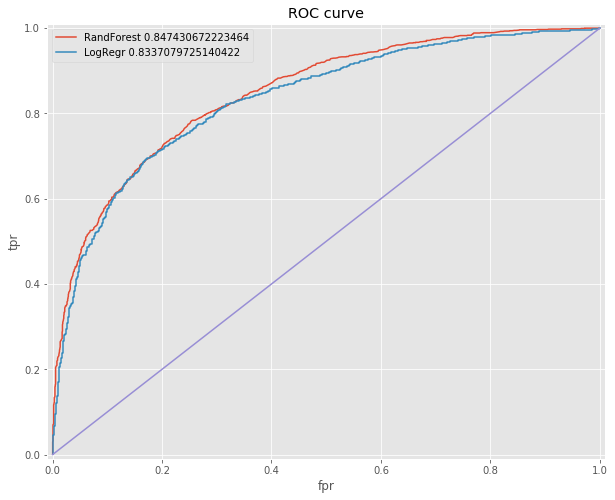

In [55]:
# сравниваем результаты
fpr, tpr, thresholds = roc_curve(y_test, predict_proba[:,1])
plt.figure(figsize=(10, 8))

plt.plot(fpr, tpr, label='RandForest '+str(roc_auc))
plt.plot(fpr_l, tpr_l, label='LogRegr '+str(roc_auc_l))

plt.plot([0, 1], [0, 1])
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.grid(True)
plt.legend()
plt.title('ROC curve')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))

## Поиск гиперпараметров

Реализуйте функцию для hyperopt по перебору гипер параметров вашего пайплайна

На всякий случай почитайте еще про [`FeatureUnion`](http://scikit-learn.org/stable/modules/generated/sklearn.pipeline.FeatureUnion.html) и [пример](http://scikit-learn.org/stable/auto_examples/hetero_feature_union.html#sphx-glr-auto-examples-hetero-feature-union-py)

In [23]:
# А это трансформер, который выбирает подможнество столбцов из матрицы X
# Который нужен для того, чтобы делать какие-то действия только для подмноества столбцов, а потом объединять результаты
# Через FeatureUnion

from hyperopt import fmin, tpe, hp, Trials, STATUS_OK, rand
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import cross_val_score
from sklearn.ensemble  import RandomForestClassifier


class ColumnSelector(BaseEstimator, TransformerMixin):
    def __init__(self, col_idx=1):
        self.col_idx = col_idx
    
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[:, self.col_idx]

In [50]:
# Опредление набора трансформеров 
model = Pipeline([
    ('data_load', FeatureUnion([
        ('first', Pipeline([
            ('column', ColumnSelector(range(300))),
            ('scaler', StandardScaler())
        ])),
        ('second', Pipeline([
            ('column', ColumnSelector(range(301,len(df_features.columns)-1))),
            ('scaler', StandardScaler())
        ]))
    ], n_jobs=-1)),
    ('clf', RandomForestClassifier(n_jobs=-1))
])

# структура конечно глупая, просто хотелось проверить как можно использовать FeatureUnion  вместе с Pipeline
# кроме того, я использовал FeatureUnion для построения датафрэйма df_features, который является исходным для 
# обучения модели

In [51]:
# формирование функции для минимизации
def f_new(params):
# Схема кросс-валидации
    n_splits = 5
    cv = StratifiedKFold(n_splits=n_splits, shuffle=True, 
                         random_state=RND_SEED)
    scores = cross_val_score(model, X, y,
                             scoring='roc_auc', 
                             cv=cv, 
                             n_jobs=-1)

    acc= scores.mean()
    std= scores.std()
    return {'loss': -acc, 'qscore': -acc, 'qscore_std': std, 'status': STATUS_OK}

In [52]:
# определим пространство параметров для поиска
RND_SEED=123
params={
    'clf_n_estimators': hp.uniform('n_estimators',300, 1000),
    'clf_max_depth' : hp.uniform('max_depth',30, 100),
    'clf_criterion': hp.choice('criterion',['gini', 'entropy']),
    'clf_random_state': RND_SEED,
    'data_load_scaler_centering': hp.choice('scaler_centering', [False, True])    
}

In [53]:
# запуск fmin - поиск максимума по roc_auc (среднему по кросс-валидационной выборке)
trial=Trials()
best = fmin(f_new, 
            params, 
            algo=tpe.suggest, 
            max_evals=100, 
            trials=trial, 
            verbose=1)

In [54]:
best

{'criterion': 1,
 'max_depth': 47.94946843142627,
 'n_estimators': 658.7436097154265,
 'scaler_centering': 0}

In [55]:
df_trials = trials_df(trial)


In [56]:
df_trials.head()

,criterion,max_depth,n_estimators,qscore,qscore_std,scaler_centering
58,1,47.949468,658.743610,0.806283,-0.009179,0
35,1,82.867710,693.438857,0.806130,-0.006017,0
54,1,55.377512,649.268626,0.805528,-0.007616,0
18,1,94.930677,576.549803,0.804199,-0.000698,0
28,0,65.124733,585.815190,0.804192,-0.006814,0


In [57]:
-trial.best_trial['result']['loss']

0.8062826731406147